# Clustering wilayah potensial produksi daging dan telur.
Tujuan dari project ini yaitu mengelompokkan kabupaten/kota di provinsi Jawa Barat berdasarkan produksi daging ayam dan telur ayam untuk menentukan pola produksi dan potensi wilayah. Hal ini dapat membantu para peternak untuk melihat daerah mana saja di Jawa Barat yang memiliki potensi dalam produksi daging dan telur.

# Proses Data Mining

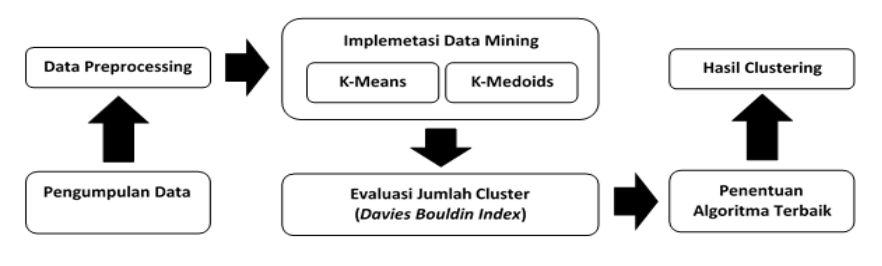


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Pengumpulan Data
Data untuk keperluan penelitian diperoleh dari Dinas Ketahanan Pangan dan Peternakan Provinsi Jawa Barat yang dipublikasikan melalui situs web https://opendata.jabarprov.go.id. Dataset yang diperoleh tentang jumlah produksi daging dan telur ayam terdiri dari delapan atribut yang menjelaskan jumlah produksi daging ayam per tahun di tiap wilayah kabupaten/kota.

# Exploratory Data Analysis (EDA):

In [2]:
# Memuat datasets dan memeriksa informasi umum dataset
def load_and_validate_data(file_path, dataset_name):
    data = pd.read_csv(file_path)
    print(f"Info {dataset_name}:")
    print(data.info())
    print(f"\nDeskripsi {dataset_name}:")
    print(data.describe())
    return data

produksi_daging = load_and_validate_data('produksi_daging_ayam.csv', 'produksi_daging')
produksi_telur = load_and_validate_data('produksi_telur_ayam.csv', 'produksi_telur')

Info produksi_daging:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   135 non-null    int64 
 1   kode_provinsi        135 non-null    int64 
 2   nama_provinsi        135 non-null    object
 3   kode_kabupaten_kota  135 non-null    int64 
 4   nama_kabupaten_kota  135 non-null    object
 5   jumlah_produksi      135 non-null    int64 
 6   satuan               135 non-null    object
 7   tahun                135 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 8.6+ KB
None

Deskripsi produksi_daging:
               id  kode_provinsi  kode_kabupaten_kota  jumlah_produksi  \
count  135.000000          135.0           135.000000       135.000000   
mean   230.000000           32.0          3231.333333      1193.222222   
std     39.115214            0.0            31.318060      2590.921304   
min  

# Preprocessing dan Proses Features Dataset:

In [3]:

# Menggabungkan data berdasarkan kode_kabupaten_kota.
data_combined = pd.merge(produksi_daging, produksi_telur, on='kode_kabupaten_kota', suffixes=('_daging', '_telur'))

# Membersihkan data dengan menghapus duplikat.
data_combined = data_combined[['nama_kabupaten_kota_daging', 'jumlah_produksi_daging', 'jumlah_produksi_telur']].drop_duplicates()

# Membuat kode unik untuk setiap kabupaten/kota.
kabupaten_unique = data_combined['nama_kabupaten_kota_daging'].unique()
kode_unik_dict = {kabupaten: f'K{i+1}' for i, kabupaten in enumerate(kabupaten_unique)}
data_combined['kode_unik'] = data_combined['nama_kabupaten_kota_daging'].map(kode_unik_dict)

# Menampilkan kode unik dan hubungan dengan nama kabupaten/kota
print("\nkode unik dan hubungan dengan nama kabupaten/kota:")
print(pd.DataFrame(kode_unik_dict.items(), columns=['Nama Kabupaten/Kota', 'Kode Unik']))


kode unik dan hubungan dengan nama kabupaten/kota:
        Nama Kabupaten/Kota Kode Unik
0           KABUPATEN BOGOR        K1
1        KABUPATEN SUKABUMI        K2
2         KABUPATEN CIANJUR        K3
3         KABUPATEN BANDUNG        K4
4           KABUPATEN GARUT        K5
5     KABUPATEN TASIKMALAYA        K6
6          KABUPATEN CIAMIS        K7
7        KABUPATEN KUNINGAN        K8
8         KABUPATEN CIREBON        K9
9      KABUPATEN MAJALENGKA       K10
10       KABUPATEN SUMEDANG       K11
11      KABUPATEN INDRAMAYU       K12
12         KABUPATEN SUBANG       K13
13     KABUPATEN PURWAKARTA       K14
14       KABUPATEN KARAWANG       K15
15         KABUPATEN BEKASI       K16
16  KABUPATEN BANDUNG BARAT       K17
17    KABUPATEN PANGANDARAN       K18
18               KOTA BOGOR       K19
19            KOTA SUKABUMI       K20
20             KOTA BANDUNG       K21
21             KOTA CIREBON       K22
22              KOTA BEKASI       K23
23               KOTA DEPOK       K2

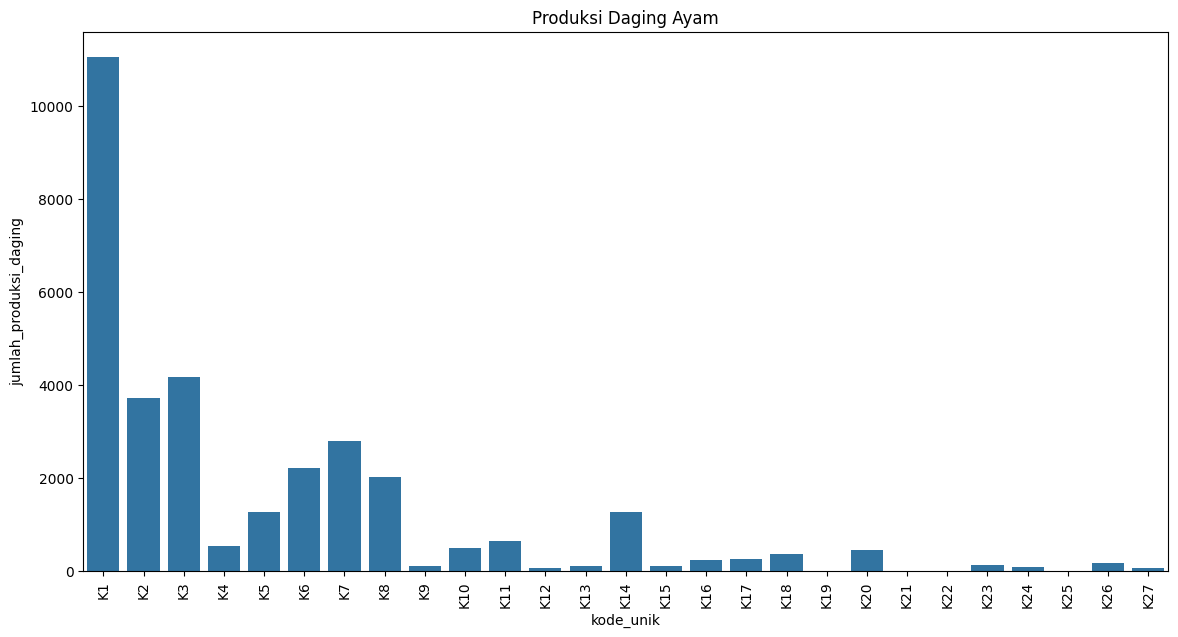

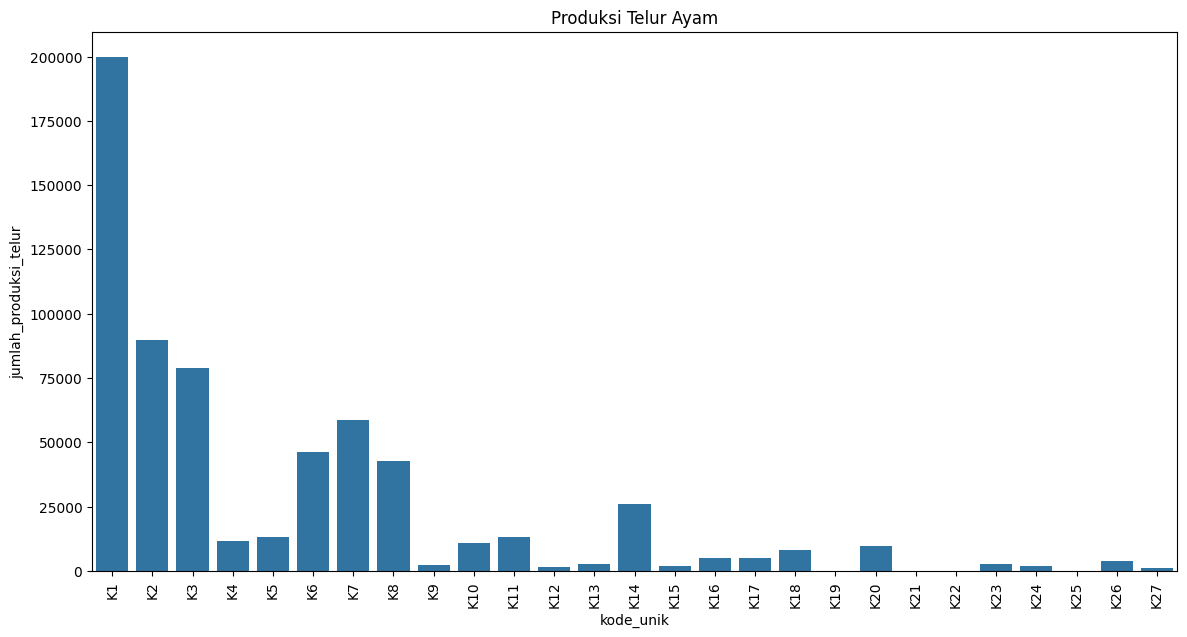

In [4]:
# Visualisasi data gabungan
def visualize_data(data, x_col, y_col, title):
    plt.figure(figsize=(14, 7))
    sns.barplot(x=x_col, y=y_col, data=data, errorbar=None)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    
# Visualisasi produksi daging ayam
visualize_data(data_combined, 'kode_unik', 'jumlah_produksi_daging', 'Produksi Daging Ayam')

# Visualisasi produksi telur ayam
visualize_data(data_combined, 'kode_unik', 'jumlah_produksi_telur', 'Produksi Telur Ayam')

In [5]:
# Menentukan jumlah klaster yang optimal menggunakan DBI
def optimal_k_dbi(data, k_range):
    dbi_scores_kmeans = []
    dbi_scores_kmedoids = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels_kmeans = kmeans.fit_predict(data)
        dbi_kmeans = davies_bouldin_score(data, labels_kmeans)
        dbi_scores_kmeans.append(dbi_kmeans)
        
        kmedoids = KMedoids(n_clusters=k, random_state=0)
        labels_kmedoids = kmedoids.fit_predict(data)
        dbi_kmedoids = davies_bouldin_score(data, labels_kmedoids)
        dbi_scores_kmedoids.append(dbi_kmedoids)
    
    optimal_k_kmeans = k_range[dbi_scores_kmeans.index(min(dbi_scores_kmeans))]
    optimal_k_kmedoids = k_range[dbi_scores_kmedoids.index(min(dbi_scores_kmedoids))]
    
    return optimal_k_kmeans, optimal_k_kmedoids, dbi_scores_kmeans, dbi_scores_kmedoids

k_range = range(2, 11)
optimal_k_kmeans, optimal_k_kmedoids, dbi_scores_kmeans, dbi_scores_kmedoids = optimal_k_dbi(data_combined[['jumlah_produksi_daging', 'jumlah_produksi_telur']], k_range)

print(f"Optimal K for K-Means: {optimal_k_kmeans}")
print(f"Optimal K for K-Medoids: {optimal_k_kmedoids}")

Optimal K for K-Means: 3
Optimal K for K-Medoids: 2


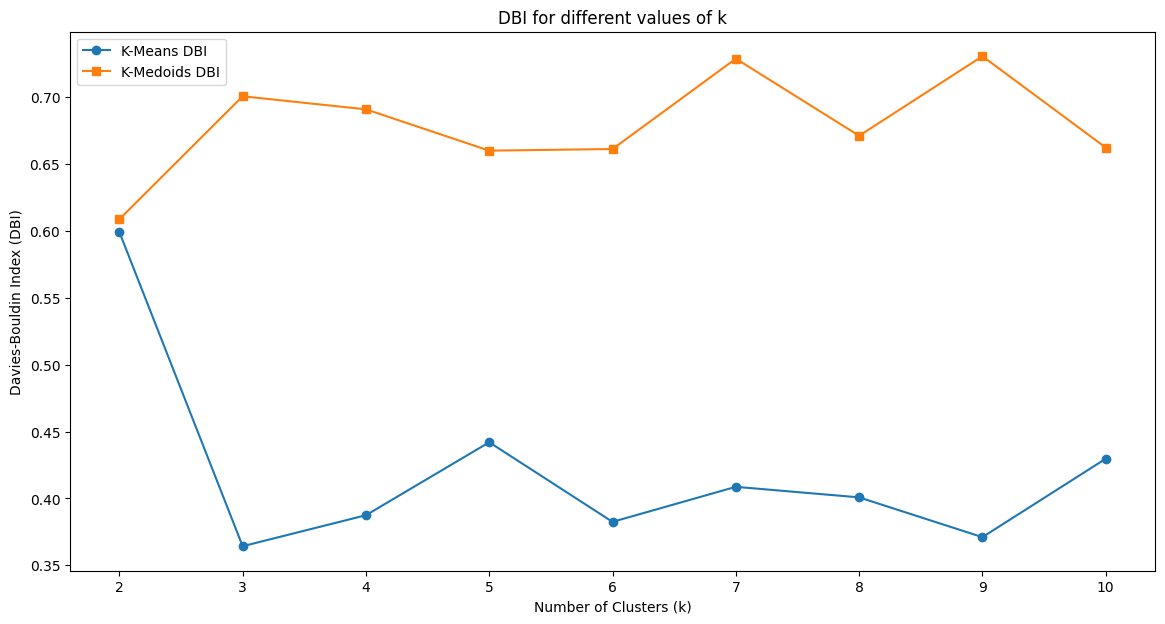

In [6]:
# Plot DBI scores
plt.figure(figsize=(14, 7))
plt.plot(k_range, dbi_scores_kmeans, label='K-Means DBI', marker='o')
plt.plot(k_range, dbi_scores_kmedoids, label='K-Medoids DBI', marker='s')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index (DBI)')
plt.title('DBI for different values of k')
plt.legend()
plt.show()


# Proses Learning / Modeling

Dengan menggunakan DBI untuk menentukan jumlah klaster yang optimal untuk K-Means dan K-Medoids yang sudah dibuat sebelumnya maka sekarang kita akan melakukan implementasinya.

In [7]:
# Implementasi K-Means dan K-Medoids dengan k optimal
kmeans = KMeans(n_clusters=optimal_k_kmeans, random_state=0)
data_combined['cluster_kmeans'] = kmeans.fit_predict(data_combined[['jumlah_produksi_daging', 'jumlah_produksi_telur']])

kmedoids = KMedoids(n_clusters=optimal_k_kmedoids, random_state=0)
data_combined['cluster_kmedoids'] = kmedoids.fit_predict(data_combined[['jumlah_produksi_daging', 'jumlah_produksi_telur']])

In [8]:
# Menghitung jumlah kabupaten unik dalam setiap klaster
jumlah_kabupaten_kmeans = data_combined.groupby('cluster_kmeans')['nama_kabupaten_kota_daging'].nunique()
jumlah_kabupaten_kmedoids = data_combined.groupby('cluster_kmedoids')['nama_kabupaten_kota_daging'].nunique()

In [9]:
# Menghitung total produksi dalam setiap klaster
total_produksi_daging_kmeans = data_combined.groupby('cluster_kmeans')['jumlah_produksi_daging'].sum()
total_produksi_telur_kmeans = data_combined.groupby('cluster_kmeans')['jumlah_produksi_telur'].sum()

total_produksi_daging_kmedoids = data_combined.groupby('cluster_kmedoids')['jumlah_produksi_daging'].sum()
total_produksi_telur_kmedoids = data_combined.groupby('cluster_kmedoids')['jumlah_produksi_telur'].sum()


In [10]:
# Membuat DataFrame hasil klasterisasi
hasil_kmeans = pd.DataFrame({
    'jumlah_kabupaten': jumlah_kabupaten_kmeans,
    'jumlah_produksi_daging': total_produksi_daging_kmeans,
    'jumlah_produksi_telur': total_produksi_telur_kmeans
})

hasil_kmedoids = pd.DataFrame({
    'jumlah_kabupaten': jumlah_kabupaten_kmedoids,
    'jumlah_produksi_daging': total_produksi_daging_kmedoids,
    'jumlah_produksi_telur': total_produksi_telur_kmedoids
})

# Evaluasi Jumlah Klaster

In [11]:
# Evaluasi dengan DBI dan Silhouette Score untuk k optimal
dbi_kmeans = davies_bouldin_score(data_combined[['jumlah_produksi_daging', 'jumlah_produksi_telur']], data_combined['cluster_kmeans'])
silhouette_kmeans = silhouette_score(data_combined[['jumlah_produksi_daging', 'jumlah_produksi_telur']], data_combined['cluster_kmeans'])

dbi_kmedoids = davies_bouldin_score(data_combined[['jumlah_produksi_daging', 'jumlah_produksi_telur']], data_combined['cluster_kmedoids'])
silhouette_kmedoids = silhouette_score(data_combined[['jumlah_produksi_daging', 'jumlah_produksi_telur']], data_combined['cluster_kmedoids'])

print(f"\nDavies-Bouldin Index (K-Means): {dbi_kmeans}")
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")

print(f"\nDavies-Bouldin Index (K-Medoids): {dbi_kmedoids}")
print(f"Silhouette Score (K-Medoids): {silhouette_kmedoids}")


Davies-Bouldin Index (K-Means): 0.36426298616835356
Silhouette Score (K-Means): 0.7849596126329725

Davies-Bouldin Index (K-Medoids): 0.608784512153735
Silhouette Score (K-Medoids): 0.7213986487235011


# Visualisasi Hasil Cluster

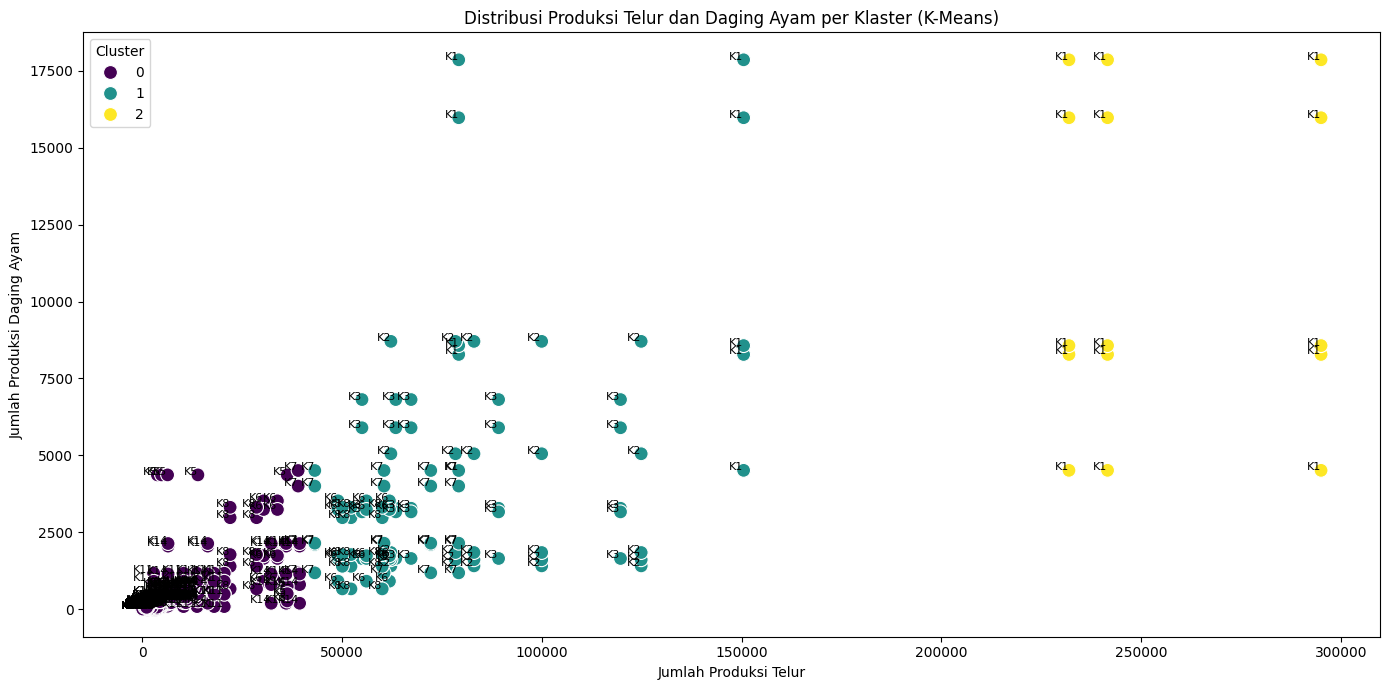

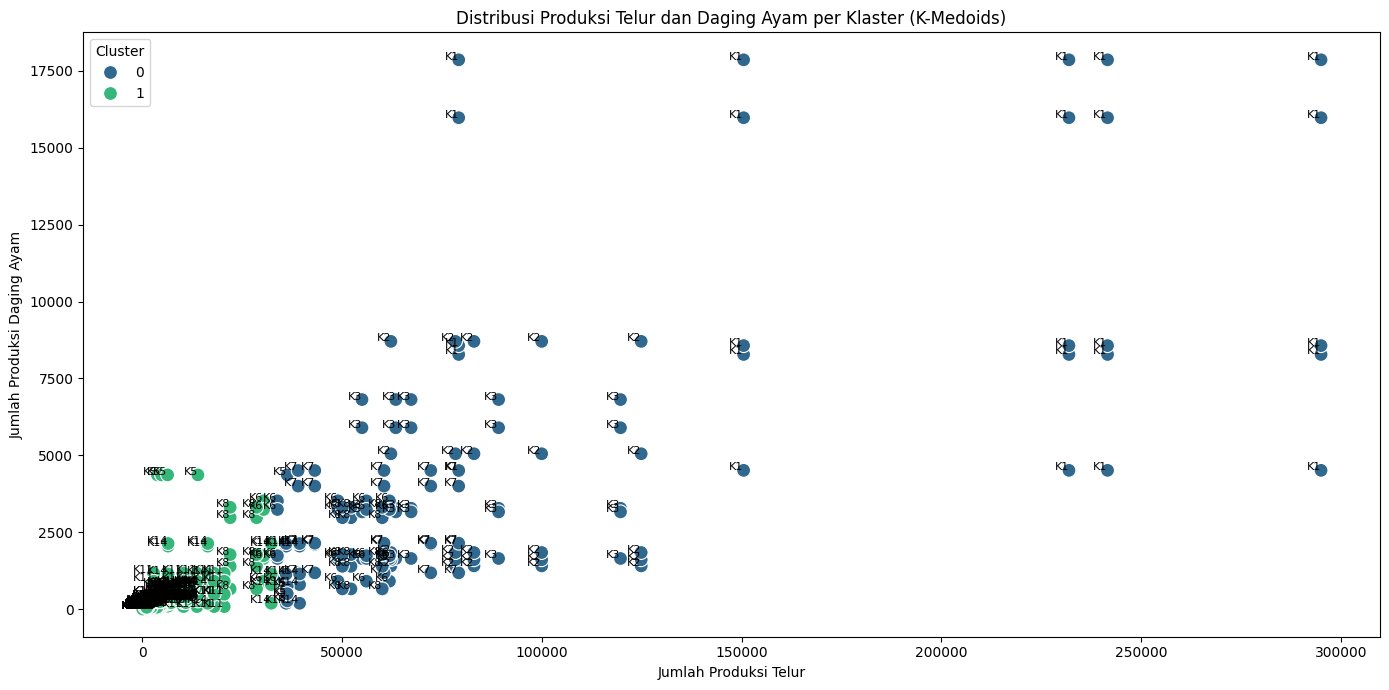

In [12]:
# Plotting clusters
def plot_clusters(data, x_col, y_col, cluster_col, title):
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=data, x=x_col, y=y_col, hue=cluster_col, palette='viridis', s=100)
    for i in range(data.shape[0]):
        plt.text(data[x_col].iloc[i], data[y_col].iloc[i], data['kode_unik'].iloc[i], fontsize=8, ha='right')
    plt.xlabel('Jumlah Produksi Telur')
    plt.ylabel('Jumlah Produksi Daging Ayam')
    plt.title(title)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

plot_clusters(data_combined, 'jumlah_produksi_telur', 'jumlah_produksi_daging', 'cluster_kmeans', 'Distribusi Produksi Telur dan Daging Ayam per Klaster (K-Means)')
plot_clusters(data_combined, 'jumlah_produksi_telur', 'jumlah_produksi_daging', 'cluster_kmedoids', 'Distribusi Produksi Telur dan Daging Ayam per Klaster (K-Medoids)')

# Hasil dan Kesimpulan

In [13]:
def summarize_clusters(data, cluster_col):
    clusters = data.groupby(cluster_col)[['nama_kabupaten_kota_daging', 'jumlah_produksi_daging', 'jumlah_produksi_telur']].agg({
        'nama_kabupaten_kota_daging': 'nunique',
        'jumlah_produksi_daging': 'mean',
        'jumlah_produksi_telur': 'mean'
    }).rename(columns={'nama_kabupaten_kota_daging': 'jumlah_kabupaten'})
    return clusters

kmeans_clusters = summarize_clusters(data_combined, 'cluster_kmeans')
kmedoids_clusters = summarize_clusters(data_combined, 'cluster_kmedoids')

print("\nHasil Klasterisasi K-Means:")
print(kmeans_clusters)

optimal_k_kmeans = kmeans.n_clusters

print("\nKabupaten/Kota dalam masing-masing klaster (K-Means):")
for cluster in range(optimal_k_kmeans):
    print(f"\nCluster {cluster}:")
    print(data_combined[data_combined['cluster_kmeans'] == cluster]['nama_kabupaten_kota_daging'].drop_duplicates().values)

print("\nHasil Klasterisasi K-Medoids:")
print(kmedoids_clusters)

optimal_k_kmedoids = kmedoids.n_clusters

print("\nKabupaten/Kota dalam masing-masing klaster (K-Medoids):")
for cluster in range(optimal_k_kmedoids):
    print(f"\nCluster {cluster}:")
    print(data_combined[data_combined['cluster_kmedoids'] == cluster]['nama_kabupaten_kota_daging'].drop_duplicates().values)


Hasil Klasterisasi K-Means:
                jumlah_kabupaten  jumlah_produksi_daging  \
cluster_kmeans                                             
0                             24              462.696703   
1                              6             3880.800000   
2                              1            11038.000000   

                jumlah_produksi_telur  
cluster_kmeans                         
0                         8166.061538  
1                        75345.454545  
2                       256143.333333  

Kabupaten/Kota dalam masing-masing klaster (K-Means):

Cluster 0:
['KABUPATEN BANDUNG' 'KABUPATEN GARUT' 'KABUPATEN TASIKMALAYA'
 'KABUPATEN CIAMIS' 'KABUPATEN KUNINGAN' 'KABUPATEN CIREBON'
 'KABUPATEN MAJALENGKA' 'KABUPATEN SUMEDANG' 'KABUPATEN INDRAMAYU'
 'KABUPATEN SUBANG' 'KABUPATEN PURWAKARTA' 'KABUPATEN KARAWANG'
 'KABUPATEN BEKASI' 'KABUPATEN BANDUNG BARAT' 'KABUPATEN PANGANDARAN'
 'KOTA BOGOR' 'KOTA SUKABUMI' 'KOTA BANDUNG' 'KOTA CIREBON' 'KOTA BEKASI'
 'KO

# Diskusi Hasil dan Kesimpulan
K-Means:<br>

Cluster 0: Terdiri dari kabupaten/kota dengan produksi rendah. Contoh: KABUPATEN BANDUNG, KABUPATEN GARUT, KABUPATEN TASIKMALAYA.<br>
Cluster 1: Terdiri dari kabupaten/kota dengan produksi sedang. Contoh: KABUPATEN BOGOR, KABUPATEN SUKABUMI, KABUPATEN CIANJUR.<br>
Cluster 2: Terdiri dari satu kabupaten/kota dengan produksi tinggi. Contoh: KABUPATEN BOGOR.<br>

K-Medoids:<br>

Cluster 0: Terdiri dari kabupaten/kota dengan produksi tinggi. Contoh: KABUPATEN BOGOR, KABUPATEN SUKABUMI.<br>
Cluster 1: Terdiri dari kabupaten/kota dengan produksi rendah. Contoh: KABUPATEN BANDUNG, KABUPATEN GARUT.<br>

Kesimpulan:<br>

K-Means memberikan hasil dengan lebih banyak klaster yang mengelompokkan kabupaten/kota berdasarkan tingkat produksi yang berbeda, sedangkan K-Medoids memberikan klaster dengan dua kategori yang lebih jelas (tinggi dan rendah).
Evaluasi DBI menunjukkan bahwa klasterisasi K-Means dengan 3 klaster dan K-Medoids dengan 2 klaster adalah pilihan yang baik, tetapi keputusan akhir harus mempertimbangkan tujuan analisis dan interpretasi data. Dan dari hasil klasterisasi yang diperoleh bisa digunakan untuk merencanakan strategi produksi berdasarkan potensi setiap wilayah.